In [ ]:
# Import Pandas and NumPy
import numpy as np
import pandas as pd
# Import Libraries for plotting
import matplotlib.pyplot as plt, seaborn as sns
# Change pandas settings to Display all columns
pd.set_option('display.max_columns',None)

In [ ]:
# General Data
general_data = pd.read_csv('/content/general_data.csv')

# Survey Data
manager_survey_data = pd.read_csv('/content/manager_survey_data.csv')
employee_survey_data = pd.read_csv('/content/employee_survey_data.csv')

# Office Entry/Exit Timings
in_time = pd.read_csv('/content/in_time.csv')
out_time = pd.read_csv('/content/out_time.csv')

# Import Data Dictionary - which contains details about each variables present in all 5 datasets
data_dictionary = pd.read_excel('/content/data_dictionary.xlsx')

In [ ]:
#Displaying the few rows of each dataset
print("General Data:")
print(general_data.head())

print("\nManager Survey Data:")
print(manager_survey_data.head())

print("\nEmployee Survey Data:")
print(employee_survey_data.head())

print("\nIn Time Data:")
print(in_time.head())

print("\nOut Time Data:")
print(out_time.head())

print("\nData Dictionary:")
print(data_dictionary.head())

General Data:
   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus

In [ ]:
# Size of Datasets
print('Shape of general_data :',general_data.shape)
general_data.head()

print('Shape of manager_survey_data :',manager_survey_data.shape)
manager_survey_data.head()

print('Shape of employee_survey_data :',employee_survey_data.shape)
employee_survey_data.head()

print('Shape of in_time :',in_time.shape)
in_time.head()

print('Shape of out_time :',out_time.shape)
out_time.head()

print('Shape of data_dictionary :',data_dictionary.shape)
data_dictionary.head()

Shape of general_data : (4410, 24)
Shape of manager_survey_data : (4410, 3)
Shape of employee_survey_data : (4410, 4)
Shape of in_time : (4410, 262)
Shape of out_time : (4410, 262)
Shape of data_dictionary : (52, 3)


,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN


In [ ]:
# Check for missing values in each dataset
print("Missing values in General Data:")
print(general_data.isnull().sum())

print("\nMissing values in Manager Survey Data:")
print(manager_survey_data.isnull().sum())

print("\nMissing values in Employee Survey Data:")
print(employee_survey_data.isnull().sum())

print("\nMissing values in In Time Data:")
print(in_time.isnull().sum())

print("\nMissing values in Out Time Data:")
print(out_time.isnull().sum())

Missing values in General Data:
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Missing values in Manager Survey Data:
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

Missing values in Employee Survey Data:
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfact

In [ ]:
# Fill missing values with median for numeric columns only
numeric_columns = general_data.select_dtypes(include=['number']).columns
general_data[numeric_columns] = general_data[numeric_columns].fillna(general_data[numeric_columns].median())

# Check for missing values again
print(general_data.isnull().sum())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [ ]:
# Display column names of in_time DataFrame
print("Columns of in_time DataFrame:")
print(in_time.columns)
# Display column names of out_time DataFrame
print("\nColumns of out_time DataFrame:")
print(out_time.columns)

Columns of in_time DataFrame:
Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)

Columns of out_time DataFrame:
Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)


In [ ]:
# Merge with general data
general_data = pd.merge(general_data, in_out_time.groupby(in_out_time.columns[0])['TotalWorkingHours'].sum().reset_index(), left_on='EmployeeID', right_on=in_out_time.columns[0])
# Check the merged data
print(general_data.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncom

In [ ]:
print(general_data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Unnamed: 0', 'TotalWorkingHours'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
X = general_data[['Age', 'Gender', 'Department', 'DistanceFromHome', 'Education', 'JobLevel']]
y = general_data['TotalWorkingHours']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 396.30538700832733


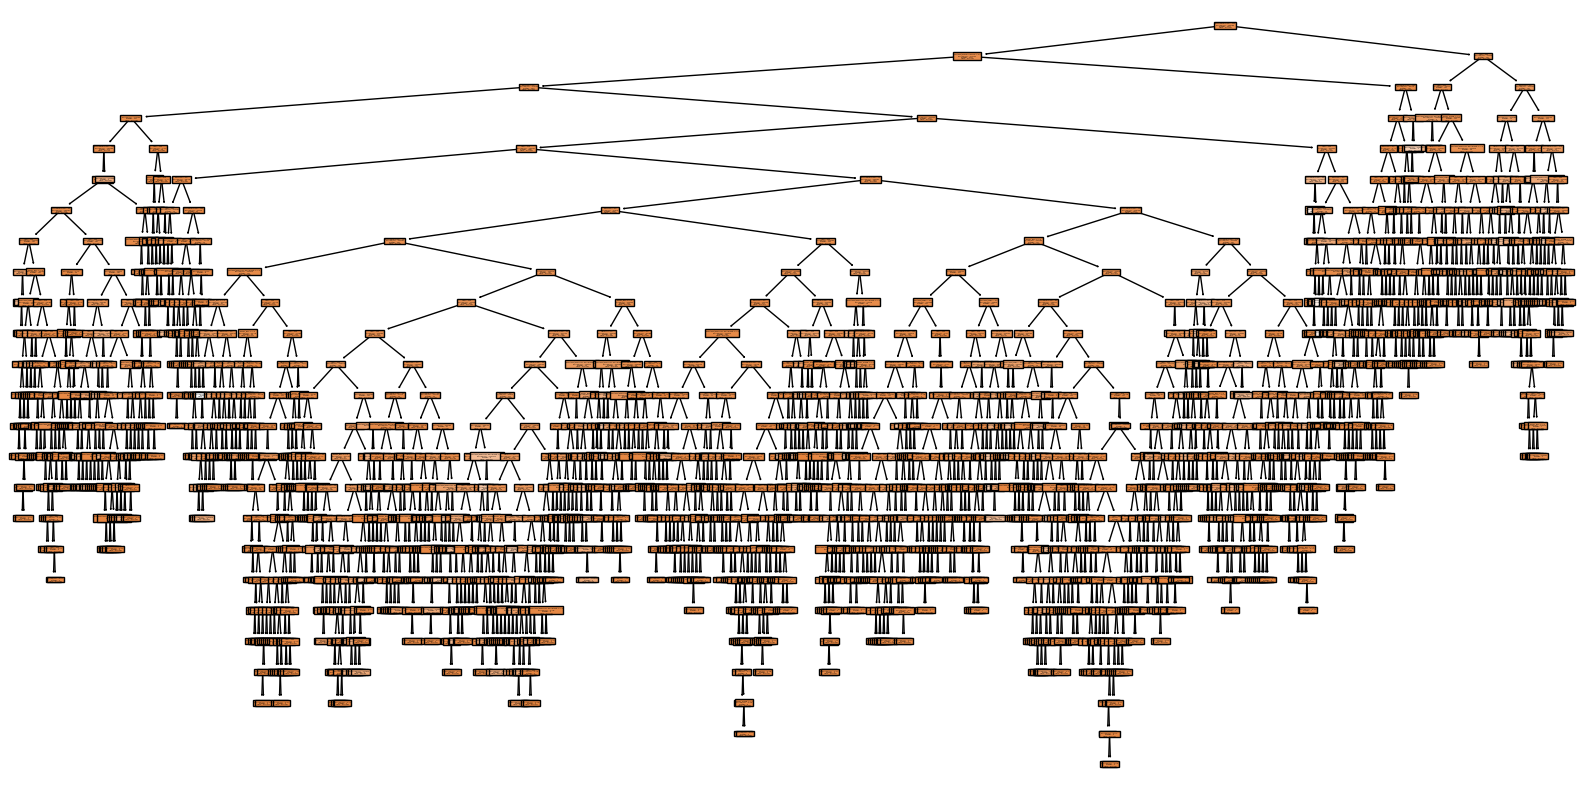

In [ ]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
X_cluster = general_data[['Age', 'DistanceFromHome', 'Education', 'JobLevel']]

# Initialize KMeans object with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans clustering model to the data
kmeans.fit(X_cluster)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
general_data['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(general_data.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncom

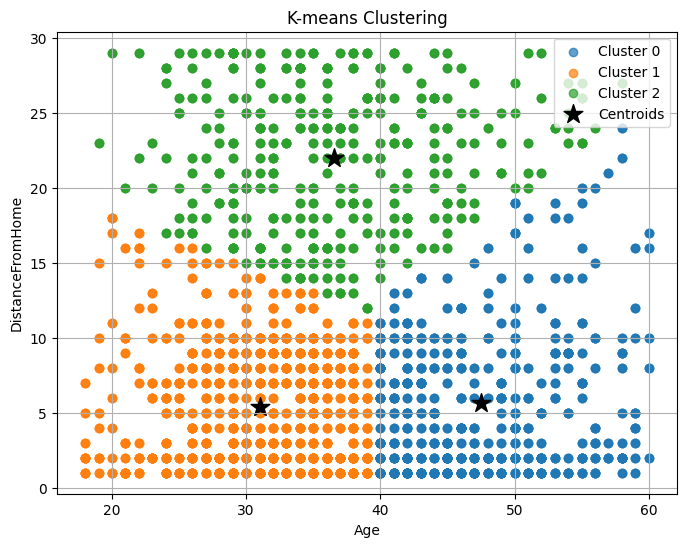

In [ ]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))

# Plot data points for each cluster
for cluster_label in set(cluster_labels):
    cluster_data = X_cluster[cluster_labels == cluster_label]
    plt.scatter(cluster_data['Age'], cluster_data['DistanceFromHome'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='black', label='Centroids')

plt.xlabel('Age')
plt.ylabel('DistanceFromHome')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compute summary statistics for each cluster
cluster_profiles = X_cluster.groupby(cluster_labels).agg(['mean', 'std', 'count'])
print(cluster_profiles)

         Age                 DistanceFromHome                 Education  \
        mean       std count             mean       std count      mean   
0  47.495169  5.658597  1242         5.666667  4.655064  1242  2.905797   
1  31.045517  5.064828  2175         5.365517  3.856941  2175  2.931034   
2  36.577039  7.660142   993        21.984894  4.557736   993  2.882175   

                   JobLevel                  
        std count      mean       std count  
0  1.006817  1242  2.038647  1.122671  1242  
1  0.995772  2175  2.126897  1.128166  2175  
2  1.103155   993  1.957704  1.027948   993  


In [ ]:
# Decision tree feature importance
feature_importance = decision_tree_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                             Feature  Importance
0                                Age    0.418444
1                   DistanceFromHome    0.232167
3                           JobLevel    0.118240
2                          Education    0.064298
8                   Department_Sales    0.051994
7  Department_Research & Development    0.049970
4                      Gender_Female    0.032954
5                        Gender_Male    0.028465
6         Department_Human Resources    0.003469


In [ ]:
# Convert non-numeric values in the 'Attrition' column to numeric
general_data['Attrition_numeric'] = general_data['Attrition'].map({'Yes': 1, 'No': 0})

# Group by cluster and compute the mean of the numeric 'Attrition' column
cluster_comparison = general_data.groupby('Cluster')['Attrition_numeric'].mean()
print(cluster_comparison)

Cluster
0    0.113527
1    0.197241
2    0.141994
Name: Attrition_numeric, dtype: float64


In [ ]:
# Tailor HR policies based on cluster characteristics
for cluster_label, cluster_data in general_data.groupby('Cluster'):
    print(f"Cluster {cluster_label}:")
    # Analyze the effectiveness of HR strategies and initiatives
    # Collect feedback from employees in each cluster
    # Adjust HR strategies and initiatives based on feedback

    # For example, segment based on Education level
    education_level = cluster_data['Education'].mean()
    if education_level < 2:
        print("Implement interventions for employees with lower education levels.")
    elif education_level >= 2 and education_level < 4:
        print("Provide development opportunities for employees with moderate education levels.")
    else:
        print("Offer advanced training programs for employees with higher education levels.")

Cluster 0:
Provide development opportunities for employees with moderate education levels.
Cluster 1:
Provide development opportunities for employees with moderate education levels.
Cluster 2:
Provide development opportunities for employees with moderate education levels.
